
#  Ames Housing Data and Kaggle Challenge

### PART 2, after the 01_EDA_and_Cleaning

## This notebook can be used for both Train and Test datasets

- configure the dataset to process in the #configuration variable
- feature engineering



In [1]:
#import packages
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from collections import defaultdict

%matplotlib inline

In [2]:
#show versions of packages
print('pandas: ', pd.__version__)
print('matplotlib: ', matplotlib.__version__)
print('seaborn: ', sns.__version__)
print('numpy: ', np.__version__)
print('json', json.__version__)

pandas:  1.3.4
matplotlib:  3.3.4
seaborn:  0.11.1
numpy:  1.21.4
json 2.0.9


In [3]:
#configuration variable
is_train_dataset = True

## Loading of  Preproc Dataset

In [4]:
if is_train_dataset:
    df_ames = pd.read_csv("../datasets/train_preproc_final.csv")
    print("Loading train_preproc_final.csv")
else:
    df_ames = pd.read_csv("../datasets/test_preproc_final.csv")
    print("Loading test_preproc_final.csv")
    
df_ames.head()

Loading train_preproc_final.csv


,Unnamed: 0,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,79.0,13517,Pave,IR1,Lvl,...,44,0,0,0,0,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,...,74,0,0,0,0,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,...,52,0,0,0,0,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,...,59,0,0,0,0,0,3,2010,WD,138500


In [5]:
#drop column index that was generated by the save csv from prior process
df_ames.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
#check for null values
df_ames.isnull().sum()[df_ames.isnull().sum()>0].sort_values()

Series([], dtype: int64)

**From the previous notebook (EDA), we have classified categorical features as Ordinal and Nominal.
For Ordinal, a dictionary will be created to show their rank, for Nominal, they will be ordered based on their average Selling Price.***

In [7]:
#Classification of Categorical variables

#ordinal data has a predetermined or natural order
ord_var = ['Street','Lot Shape', 'Utilities','Land Slope','Exter Qual',
       'Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2','Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Finish','Garage Qual',
       'Garage Cond', 'Paved Drive']


#Nominal data is classified without a natural order or rank
nom_var = ['Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Heating','Sale Type', 'MS Zoning','Land Contour','Lot Config','Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Foundation',
       'Garage Type']


In [8]:
#ordinal_dict is manually created ranking (domain knoweldge)

ordinal_dict = {
    
    'Street': {'Pave':2, 'Grvl':1, 'missing':0} ,
    'Lot Shape' : {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1, 'missing':0},
    'Utilities' : {'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'missing':0},
    'Land Slope' : {'Gtl':3, 'Mod':2, 'Sev':1, 'missing':0}   ,
    'Exter Qual' : {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0},
    'Exter Cond' : {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0},
    'Bsmt Qual' : {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0},
    'Bsmt Cond' : {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0},
    'Bsmt Exposure' : {'Gd':4, 'Av':3, 'Mn':2, 'No':0, 'missing':0} ,
    'BsmtFin Type 1' : {'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'missing':0},
    'BsmtFin Type 2' : {'GLQ':6,'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'missing':0},
    'Heating QC' :{'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0},
    'Central Air' :{'Y':1, 'N':0, 'missing':0}, 
    'Electrical' :{'SBrkr':5, 'FuseA':4,'FuseF':3, 'FuseP':2, 'Mix':1, 'missing':0}, 
    'Kitchen Qual' :{'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0}, 
    'Functional' :{'Typ':8,'Min1':7,'Min2':6, 'Mod':5, 'Maj1':4,'Maj2':3, 'Sev':2,'Sal':1, 'missing':0},
    'Fireplace Qu' :{'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0}, 
    'Garage Finish' :{'Fin':3, 'RFn':2, 'Unf':1, 'missing':0 },
    'Garage Qual' :{'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0},
    'Garage Cond' :{'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'missing':0}, 
    'Paved Drive' :{'Y':2, 'P':1, 'N':0, 'missing':0 }
}

In [9]:
def nominal_rank_by_mean_SalePrice(df, feature):
    '''Function to rank the nominal categorical features based on their mean
    '''
    
    v_dic = {}
    
    grouped = df.loc[:,[feature, 'SalePrice']] \
                .groupby(feature) \
                .mean() \
                .sort_values(by='SalePrice')
    
    grouped['Rank'] = grouped['SalePrice'].rank(ascending=True)
    
    v_dic[feature] =grouped['Rank'].to_dict()
    
    return v_dic

In [10]:
def def_value():
    '''This will be used by the dictionary for default value as 0'''
    return 0

In [11]:
#For train dataset , we will call the function above to build our nominal dictionary
#We need to save the dictionary as csv and reload to be used by test dataset

nominal_dict = defaultdict(def_value)

if is_train_dataset:
    for nom in nom_var:
        nominal_dict = {**nominal_dict, **nominal_rank_by_mean_SalePrice(df_ames, nom)}
    
    with open('../datasets/nominaldict.json', 'w') as fp:
        json.dump(nominal_dict, fp)
else:
    with open('../datasets/nominaldict.json', 'r') as fp:
        nominal_dict = json.load(fp)

In [12]:
nominal_dict

{'Roof Matl': {'CompShg': 1.0,
  'Tar&Grv': 2.0,
  'Membran': 3.0,
  'WdShake': 4.0,
  'WdShngl': 5.0},
 'Exterior 1st': {'AsphShn': 1.0,
  'CBlock': 2.0,
  'AsbShng': 3.0,
  'BrkComm': 4.0,
  'Stucco': 5.0,
  'Wd Sdng': 6.0,
  'MetalSd': 7.0,
  'WdShing': 8.0,
  'HdBoard': 9.0,
  'Plywood': 10.0,
  'BrkFace': 11.0,
  'CemntBd': 12.0,
  'VinylSd': 13.0,
  'Stone': 14.0,
  'ImStucc': 15.0},
 'Exterior 2nd': {'CBlock': 1.0,
  'AsbShng': 2.0,
  'AsphShn': 3.0,
  'Brk Cmn': 4.0,
  'Wd Sdng': 5.0,
  'Wd Shng': 6.0,
  'Stone': 7.0,
  'Stucco': 8.0,
  'MetalSd': 9.0,
  'HdBoard': 10.0,
  'Plywood': 11.0,
  'BrkFace': 12.0,
  'CmentBd': 13.0,
  'VinylSd': 14.0,
  'ImStucc': 15.0},
 'Mas Vnr Type': {'BrkCmn': 1.0,
  'None': 2.0,
  'BrkFace': 3.0,
  'missing': 4.0,
  'Stone': 5.0},
 'Heating': {'Grav': 1.0, 'Wall': 2.0, 'OthW': 3.0, 'GasW': 4.0, 'GasA': 5.0},
 'Sale Type': {'ConLw': 1.0,
  'Oth': 2.0,
  'ConLD': 3.0,
  'COD': 4.0,
  'ConLI': 5.0,
  'WD ': 6.0,
  'CWD': 7.0,
  'New': 8.0,
  'Con'

## Feature Engineering

In [13]:
#map all ordinal features 
for feature in ord_var:
    df_ames[feature] = df_ames[feature].map(lambda x: ordinal_dict[feature][x])
    print("converted: ", feature)

converted:  Street
converted:  Lot Shape
converted:  Utilities
converted:  Land Slope
converted:  Exter Qual
converted:  Exter Cond
converted:  Bsmt Qual
converted:  Bsmt Cond
converted:  Bsmt Exposure
converted:  BsmtFin Type 1
converted:  BsmtFin Type 2
converted:  Heating QC
converted:  Central Air
converted:  Electrical
converted:  Kitchen Qual
converted:  Functional
converted:  Fireplace Qu
converted:  Garage Finish
converted:  Garage Qual
converted:  Garage Cond
converted:  Paved Drive


In [14]:
#map all nominal features 
for feature in nom_var:
    df_ames[feature] = df_ames[feature].map(lambda x: nominal_dict[feature][x] if x in nominal_dict[feature] else 0)
    print("converted: ", feature)

converted:  Roof Matl
converted:  Exterior 1st
converted:  Exterior 2nd
converted:  Mas Vnr Type
converted:  Heating
converted:  Sale Type
converted:  MS Zoning
converted:  Land Contour
converted:  Lot Config
converted:  Neighborhood
converted:  Condition 1
converted:  Condition 2
converted:  Bldg Type
converted:  House Style
converted:  Roof Style
converted:  Foundation
converted:  Garage Type


In [15]:
df_ames.shape

(1955, 77)

***The next few codes are looking at the engineered feature to discover any interesting insights if there's any significant impact if the house sold is renovated within 5 years***

In [16]:
def is_remodel(df):
    
    if (df['Year Built'] == df['Year Remod/Add']):# same year, no remodelling
        return 0
    if (df['Remodel_Age'] <= 5):   #age of the remodellign is less than = to 5 years
        return 1
    else:
        return 0
        

In [17]:
#Age calculation based in Year it was sold and Year it was built
df_ames['HouseAge'] = df_ames['Yr Sold']- df_ames['Year Built']

#How long ago was the remodelling when the property is sold
df_ames['Remodel_Age'] = df_ames['Yr Sold'] - df_ames['Year Remod/Add'] 

#is_Remodeled is a featurethat has value 0 or 1
#0 it means that it is not remodelled or remodelled but it is older than 5 years (Remodel_Age > 5)
#1 means remodelled within 5 years (Remodel_Age is 1-5)  
#df_ames['is_Remodeled'] = df_ames['Remodel_Age'].map(lambda x: 1 if (x in [1,5]) else 0)

df_ames['is_Remodeled'] = df_ames.apply(is_remodel, axis=1)

In [18]:
df_ames['Remodel_Age'].describe()

count    1955.000000
mean       24.585678
std        20.998299
min        -1.000000
25%         5.000000
50%        17.000000
75%        44.000000
max        60.000000
Name: Remodel_Age, dtype: float64

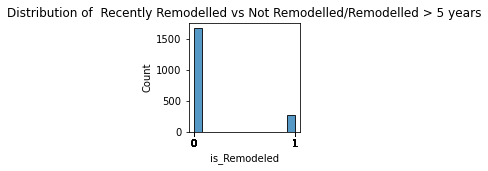

In [19]:
#check the distribution
plt.figure(figsize=(2,2))
sns.histplot(df_ames['is_Remodeled'], kde=False);
plt.xticks(df_ames['is_Remodeled'])
plt.title('Distribution of  Recently Remodelled vs Not Remodelled/Remodelled > 5 years');

In [20]:
df_ames['is_Remodeled'].value_counts()

0    1674
1     281
Name: is_Remodeled, dtype: int64

More than 14% of the properties sold are recently remodelled

In [21]:
if is_train_dataset:
    print(df_ames.groupby(by='is_Remodeled')['SalePrice'].mean())

is_Remodeled
0    166140.516726
1    193957.580071
Name: SalePrice, dtype: float64


In [22]:
#Percentage of increase for recently remodelled (5 years) vs not remodelled/remodelled more than 5 years
print('%:', round((193957-166140)/166140 * 100,2))

%: 16.74


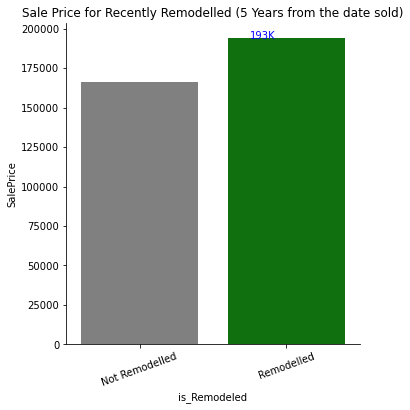

In [23]:
if is_train_dataset:
    #visualizing the difference of mean with 'is Remodeled'
    if is_train_dataset:
        sns.catplot(data=df_ames, y='SalePrice', x='is_Remodeled' , palette=["grey","green"], kind='bar',ci=None)
        plt.title('Sale Price for Recently Remodelled (5 Years from the date sold)');

    #plt.axhline(y=df_ames["SalePrice"].mean(), color = 'blue', linestyle = 'dotted')
    #plt.text(x =0,
    #    y = df_ames["SalePrice"].mean(), 
    #    s = 'Average Sale Price:' +  str(round(df_ames["SalePrice"].mean()/1000,0)) + "K" , 
    #   color = 'red') 

    plt.text(x =.75,
        y = 193957, 
        s = '193K' , 
        color = 'blue') 

    plt.xticks([0, 1], ['Not Remodelled', 'Remodelled'],  rotation=20);

<Figure size 720x360 with 0 Axes>

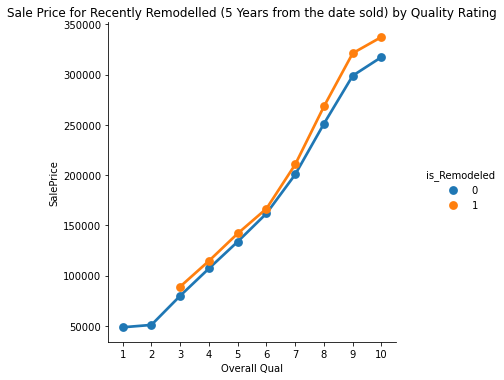

In [24]:
#FOR presentation, need simple graph please!

if is_train_dataset:
    #visualizing the difference of mean with recent remodelling (5 years before it is sold)
    plt.figure(figsize=(10,5))

    sns.catplot(data=df_ames, hue='is_Remodeled', y='SalePrice', x='Overall Qual', kind='point',ci=None );

    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.title('Sale Price for Recently Remodelled (5 Years from the date sold) by Quality Rating');

- There is no remodelling for  Quality Rating of 1 and 2 (for obvious reason their quality is poor)
- The remodeled properties generally have higher average Sale Price.


#### During the EDA, we looked at 'Gr Live Area' and 'Total Bsmt SF'

In [25]:
#create a feature variable that adds the 'Gr Liv Area' and 'Total Bsmt SF'

df_ames['Total_SF'] = df_ames['Gr Liv Area'] + df_ames['Total Bsmt SF']

if is_train_dataset:
    #check the correlation
    print(df_ames[['Total_SF','Gr Liv Area','Total Bsmt SF','SalePrice']].corr())

               Total_SF  Gr Liv Area  Total Bsmt SF  SalePrice
Total_SF       1.000000     0.839325       0.783251   0.782749
Gr Liv Area    0.839325     1.000000       0.319424   0.677607
Total Bsmt SF  0.783251     0.319424       1.000000   0.589500
SalePrice      0.782749     0.677607       0.589500   1.000000


***Total Square foot has higher correlation (78%), than 'Gr Live Area' and 'Total Bsmt SF' when added.

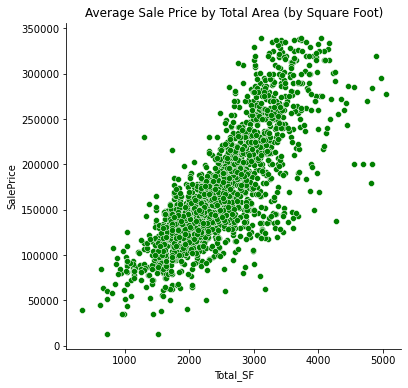

In [26]:
if is_train_dataset:
    plt.figure(figsize=(6,6))
    plt.title('Average Sale Price by Total Area (by Square Foot)')
    sns.scatterplot(x=df_ames['Total_SF'], y=df_ames['SalePrice'], color='green');
    sns.despine(bottom = False, left = False);

In [27]:
#do we still have categorical features, there should be ZERO as we transformed them to their  ranking
df_ames.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [28]:
#final check for null values
df_ames.isnull().sum()[df_ames.isnull().sum()>0].sort_values()

Series([], dtype: int64)

<Figure size 432x288 with 0 Axes>

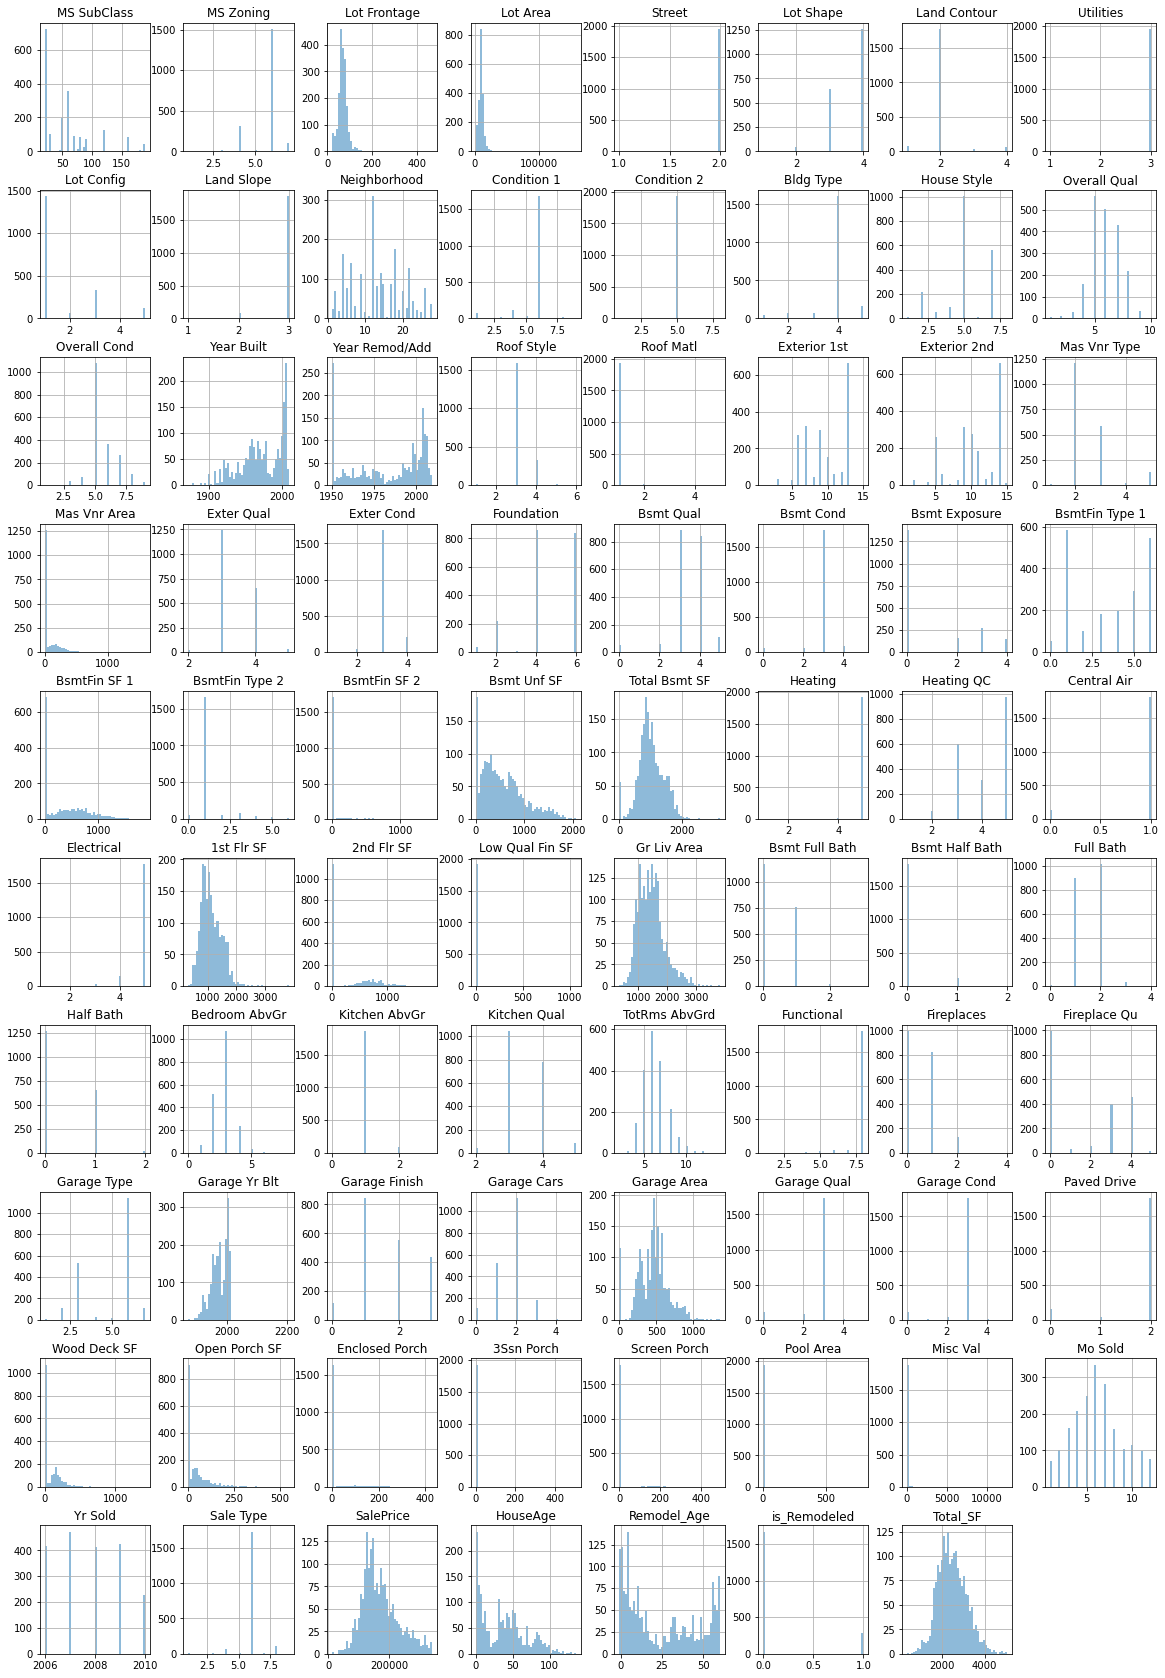

In [29]:
#check the distribution after cleanup and feature engineering
plt.figure()
df_ames.drop(columns=['Id', 'PID']).hist(layout=(10,8), alpha=0.5, bins=50,figsize=(20,30));

**There are only few that has normal distribution:
Tota Bsmt SF, 1st Flr SF, Gr Liv Area, TotRms AbvGrd, SalePrice and Total_SF**

### What is our top 10 correlation after feature engineering, did it change from our previous EDA?

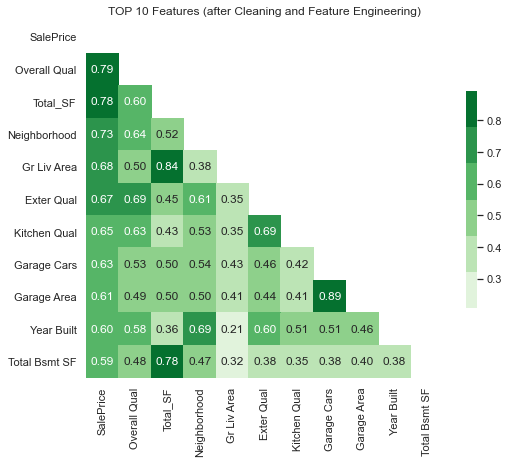

In [30]:
#Correlation after feature engineering
## Lets look at our TOP 10 features again
if is_train_dataset:
    corr = df_ames.corr()
    
    # creating a colormap
    colormap = sns.color_palette("Greens")
    
    plt.figure(figsize=(8,8))
    sns.set(style="white")

    k = 11
    cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
    corr_10 =  df_ames[cols].corr()
    
    mask = np.zeros_like(corr_10)
    mask[np.triu_indices_from(mask)] = True
    
    plt.title('TOP 10 Features (after Cleaning and Feature Engineering)')
    sns.heatmap(corr_10, annot=True,mask=mask, square=True, fmt='.2f', cbar_kws={"shrink": .5}, cmap=colormap)

### It changed! Total SF, Neighborhood, Exter Qual were now in top 10

In [31]:
#saved the preprocessed files
if is_train_dataset:
    df_ames.to_csv("../datasets/train_wfeature_all.csv")
    print("Successfully saved train_wfeature_all.csv")
else:
    df_ames.to_csv("../datasets/test_wfeature_all.csv")
    print("Successfully saved test_wfeature_all.csv")

Successfully saved train_wfeature_all.csv


# Summary:

 - ***Ordinal Features*** are transformed using the dictionary that shows their ordinal values (manually created)
 - ***Nominal Features*** are transformed using the dictionary that is automatically created from train dataset by  ranking the the mean of SalePrice, the same dictionary is used for Test, if the value is not in the train dataset, it will populate as 0
 
 - Feature Engineering:
   - ***HouseAge*** is calculated based on the Year the house is build, minus the Year it was sold.
   - ***Total_SF*** =  We added 'Gr Liv Area' and 'Total Bsmt SF'
   - ***Remodel_Age*** = 'Year Sold' minus the 'Year Remod/Add' 
   - ***is_Remodeled*** = if the Remodel_Age <=5 then 1 (Yes), else 0 (No)